# Import Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from src import detect_faces, show_bboxes
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

import torch
from torchvision import transforms, datasets
import numpy as np
import os

# Path Definitions

In [3]:
dataset_path = '../Dataset/emotiw/test/'
face_coordinates_directory = '../Dataset/FaceCoordinates/'
processed_dataset_path = '../Dataset/CroppedImages/test/'
processed_face_ex = '../Dataset/CroppedFaces/test/'

# Loading Test Dataset

In [4]:
test_dataset = datasets.ImageFolder(dataset_path)

class_names = test_dataset.classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
class_names

['test_shared']

In [6]:
test_filelist = sorted(os.listdir(dataset_path + 'test_shared/'))

In [7]:
test_filelist = [x.split('.')[0] for x in test_filelist]

In [8]:
print(test_filelist[:10])

['test_1', 'test_10', 'test_100', 'test_1000', 'test_1001', 'test_1002', 'test_1003', 'test_1004', 'test_1005', 'test_1006']


In [9]:
print(len(test_dataset))

3011


# Crop Faces

test_1
0
test_10
1
test_100
2
test_1000
3
test_1001
4
test_1002
5
test_1003
6
test_1004
7
test_1005
8
test_1006
9
test_1007
10
test_1008
11
test_1009
12
test_101
13
test_1010
14
test_1011
15
test_1012
No bounding boxes for test_1012. Adding empty file for the same
test_1013
17
test_1014
No bounding boxes for test_1014. Adding empty file for the same
test_1015
19
test_1016
20
test_1017
21
test_1018
22
test_1019
23
test_102
24
test_1020
25
test_1021
26
test_1022
27
test_1023
28
test_1024
29
test_1025
30
test_1026
31
test_1027
32
test_1028
33
test_1029
34
test_103
35
test_1030
36
test_1031
37
test_1032
38
test_1033
39
test_1034
40
test_1035
41
test_1036
42
test_1037
43
test_1038
44
test_1039
No bounding boxes for test_1039. Adding empty file for the same
test_104
46
test_1040
47
test_1041
48
test_1042
49
test_1043
50
test_1044
51
test_1045
52
test_1046
53
test_1047
54
test_1048
55
test_1049
56
test_105
57
test_1050
58
test_1051
59
test_1052
60
test_1053
61
test_1054
62
test_1055
63
test_1

567
test_151
568
test_1510
569
test_1511
570
test_1512
571
test_1513
572
test_1514
573
test_1515
574
test_1516
575
test_1517
576
test_1518
577
test_1519
578
test_152
579
test_1520
580
test_1521
581
test_1522
582
test_1523
583
test_1524
584
test_1525
585
test_1526
No bounding boxes for test_1526. Adding empty file for the same
test_1527
587
test_1528
588
test_1529
589
test_153
590
test_1530
591
test_1531
592
test_1532
593
test_1533
594
test_1534
595
test_1535
596
test_1536
597
test_1537
No bounding boxes for test_1537. Adding empty file for the same
test_1538
599
test_1539
600
test_154
601
test_1540
602
test_1541
603
test_1542
604
test_1543
605
test_1544
606
test_1545
607
test_1546
608
test_1547
609
test_1548
610
test_1549
611
test_155
612
test_1550
613
test_1551
614
test_1552
615
test_1553
616
test_1554
617
test_1555
618
test_1556
619
test_1557
620
test_1558
621
test_1559
622
test_156
623
test_1560
624
test_1561
625
test_1562
626
test_1563
627
test_1564
628
test_1565
629
test_1566
630


1110
test_2
1111
test_20
1112
test_200
1113
test_2000
1114
test_2001
1115
test_2002
1116
test_2003
1117
test_2004
1118
test_2005
1119
test_2006
1120
test_2007
1121
test_2008
1122
test_2009
1123
test_201
1124
test_2010
1125
test_2011
1126
test_2012
1127
test_2013
No bounding boxes for test_2013. Adding empty file for the same
test_2014
No bounding boxes for test_2014. Adding empty file for the same
test_2015
1130
test_2016
1131
test_2017
1132
test_2018
1133
test_2019
1134
test_202
1135
test_2020
1136
test_2021
1137
test_2022
1138
test_2023
1139
test_2024
1140
test_2025
1141
test_2026
1142
test_2027
1143
test_2028
1144
test_2029
1145
test_203
1146
test_2030
1147
test_2031
1148
test_2032
1149
test_2033
1150
test_2034
1151
test_2035
1152
test_2036
1153
test_2037
1154
test_2038
1155
test_2039
No bounding boxes for test_2039. Adding empty file for the same
test_204
1157
test_2040
1158
test_2041
1159
test_2042
1160
test_2043
1161
test_2044
1162
test_2045
1163
test_2046
1164
test_2047
1165
tes

1617
test_2455
1618
test_2456
1619
test_2457
1620
test_2458
1621
test_2459
1622
test_246
1623
test_2460
1624
test_2461
1625
test_2462
1626
test_2463
1627
test_2464
1628
test_2465
1629
test_2466
1630
test_2467
1631
test_2468
1632
test_2469
1633
test_247
1634
test_2470
1635
test_2471
1636
test_2472
1637
test_2473
1638
test_2474
1639
test_2475
1640
test_2476
1641
test_2477
1642
test_2478
1643
test_2479
1644
test_248
1645
test_2480
No bounding boxes for test_2480. Adding empty file for the same
test_2481
1647
test_2482
1648
test_2483
1649
test_2484
1650
test_2485
1651
test_2486
1652
test_2487
1653
test_2488
1654
test_2489
1655
test_249
1656
test_2490
1657
test_2491
1658
test_2492
1659
test_2493
1660
test_2494
1661
test_2495
1662
test_2496
1663
test_2497
1664
test_2498
1665
test_2499
1666
test_25
1667
test_250
1668
test_2500
1669
test_2501
1670
test_2502
1671
test_2503
1672
test_2504
1673
test_2505
1674
test_2506
1675
test_2507
No bounding boxes for test_2507. Adding empty file for the same

2105
test_2895
2106
test_2896
2107
test_2897
2108
test_2898
2109
test_2899
2110
test_29
2111
test_290
2112
test_2900
2113
test_2901
2114
test_2902
2115
test_2903
No bounding boxes for test_2903. Adding empty file for the same
test_2904
2117
test_2905
2118
test_2906
2119
test_2907
2120
test_2908
2121
test_2909
2122
test_291
2123
test_2910
2124
test_2911
2125
test_2912
2126
test_2913
2127
test_2914
2128
test_2915
2129
test_2916
2130
test_2917
2131
test_2918
2132
test_2919
2133
test_292
2134
test_2920
2135
test_2921
2136
test_2922
2137
test_2923
2138
test_2924
2139
test_2925
2140
test_2926
2141
test_2927
2142
test_2928
2143
test_2929
2144
test_293
2145
test_2930
2146
test_2931
2147
test_2932
2148
test_2933
2149
test_2934
2150
test_2935
2151
test_2936
2152
test_2937
2153
test_2938
2154
test_2939
2155
test_294
2156
test_2940
2157
test_2941
2158
test_2942
2159
test_2943
2160
test_2944
2161
test_2945
2162
test_2946
2163
test_2947
2164
test_2948
2165
test_2949
2166
test_295
2167
test_2950
2168

2664
test_688
2665
test_689
2666
test_69
2667
test_690
2668
test_691
2669
test_692
2670
test_693
2671
test_694
2672
test_695
2673
test_696
2674
test_697
2675
test_698
2676
test_699
2677
test_7
2678
test_70
2679
test_700
2680
test_701
2681
test_702
2682
test_703
2683
test_704
2684
test_705
2685
test_706
2686
test_707
2687
test_708
2688
test_709
2689
test_71
2690
test_710
2691
test_711
2692
test_712
2693
test_713
2694
test_714
2695
test_715
2696
test_716
2697
test_717
2698
test_718
2699
test_719
2700
test_72
2701
test_720
2702
test_721
2703
test_722
2704
test_723
2705
test_724
2706
test_725
2707
test_726
2708
test_727
2709
test_728
2710
test_729
2711
test_73
2712
test_730
2713
test_731
2714
test_732
2715
test_733
2716
test_734
2717
test_735
2718
test_736
2719
test_737
2720
test_738
2721
test_739
2722
test_74
2723
test_740
2724
test_741
2725
test_742
2726
test_743
2727
test_744
2728
test_745
2729
test_746
2730
test_747
2731
test_748
2732
test_749
2733
test_75
2734
test_750
2735
test_751
2

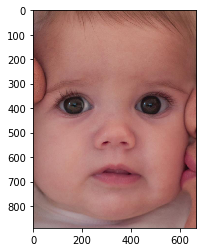

In [10]:
for i in range(len(test_dataset)):
    print(test_filelist[i])
    image, label = test_dataset[i]

    face_list = []
    landmarks_new_coordinates = []

    if os.path.isfile(processed_face_ex + 'test/' + test_filelist[i] + '.npz'):
        print(test_filelist[i] + ' Already present')
        continue

    bbox_lm = np.load(face_coordinates_directory + 'test/' + test_filelist[i] +'.npz')
    bounding_boxes = bbox_lm['a']
    if bounding_boxes.size == 0 or (bounding_boxes[0] == 0).all():
        print("No bounding boxes for " + test_filelist[i] + ". Adding empty file for the same")
        np.savez(processed_face_ex + test_filelist[i], a = np.zeros(1), b = np.zeros(1))
        continue
    landmarks = bbox_lm['b']

    for j in range(len(bounding_boxes)):
        bbox_coordinates = bounding_boxes[j]
        landmark = landmarks[j]
        img_face = image.crop((bbox_coordinates[0], bbox_coordinates[1], bbox_coordinates[2], bbox_coordinates[3]))

        x = bbox_coordinates[0]
        y = bbox_coordinates[1]
        for k in range(5):
            landmark[k] -= x
            landmark[k+5] -= y
        img_face = np.array(img_face)
        landmark = np.array(landmark)


        if len(face_list) != 0:
            if img_face.shape[0] == face_list[-1].shape[0]:
                img_face = image.crop((bbox_coordinates[0] - 1, bbox_coordinates[1] - 1, bbox_coordinates[2], bbox_coordinates[3]))
                img_face = np.array(img_face)
                landmark +=1

        face_list.append(img_face)
        landmarks_new_coordinates.append(landmark)
    face_list = np.asarray(face_list)
    landmarks_new_coordinates = np.asarray(landmarks_new_coordinates)
    np.savez(processed_face_ex + test_filelist[i], a = face_list, b = landmarks_new_coordinates)

    for j in range(len(face_list)):
        if face_list[j].shape == ():
             continue
        imgplot = plt.imshow(face_list[j])
        im = Image.fromarray(face_list[j])
        im.save(processed_dataset_path + test_filelist[i] + "_"+str(j)+".jpg")

    print(i)